In [127]:
import numpy as np
import matplotlib.pyplot as plt
import time


##  Markov-Chain Monte Carlo

First exercise is done with second. The distribution is Boltzmann. The starting state P is where all spin is 1. 
New configuration is proposed and accepted accroding to equation 1 in exercise sheet. 
Again new configuration is the old one. Thus a Markov-Chain.

In [156]:
def lambda_function(j,H,sign = 1):  # This is our lambda
    lamda = np.e**(j)*(np.cosh(H) + sign*np.sqrt(np.sinh(H)**2+ np.e**(-4*j)))
    return lamda

def Partition_function(j,H,N): # This is then partation function
    Z = (lambda_function(j,H,1))**N + (lambda_function(j,H,-1))**N
    return Z

def magnetization_per_spin_inf(j,H): # Net magnetizaiton per spin in limit N to inf
    nummerator = np.sinh(H)
    divisor = np.sqrt(np.sinh(H)**2+np.e**(-4*j))
    return nummerator/divisor

def derivative_lambda(j,H,sign):
    derive = np.e**j *(sign* np.sinh(H)*np.cosh(H)/
                    (np.sqrt(np.sinh(H)**2 + np.e**(-4*j))) -np.sinh(H))
    return derive

def magnetization_per_spin_our(j,H,N):
    part_frac = 1/Partition_function(j,H,N)
    derivative = N * (lambda_function(j,H,1)**(N-1)*derivative_lambda(j,H,1)+
                      lambda_function(j,H,-1)**(N-1)*derivative_lambda(j,H,-1))
    return part_frac * derivative /N



####### Action 
def nebhior_sum(spin_lattice):
    length = len(spin_lattice)
    sum = 0
    for i in range(length):
        sum += spin_lattice[i//length]* spin_lattice[(i-1)//length] + spin_lattice[i//length]* spin_lattice[(i+1)//length]
    return sum

def action(j,H,spin_lattice):
    S = -j* nebhior_sum(spin_lattice) -H *sum(spin_lattice)
    return S

def action_difference(j,H,i,spin_lattice): ##### only nebhiour spins differ
    N = len(spin_lattice)
    proposed_spin = -1*spin_lattice[i//N]
    delta_H = -j*(proposed_spin-spin_lattice[i//N])*(2*spin_lattice[(i-1)//N]+spin_lattice[(i+1)//N]) 
    delta_M = -H*(proposed_spin-spin_lattice[i//N])
    return delta_H + delta_M






In [114]:
# Plot the dimesonless quantities

N = 7
j = 0.78
H = 0.001
exact = magnetization_per_spin_inf(j,H)
dimenson_less = magnetization_per_spin_our(j,H,N)
print(exact,dimenson_less)
N = 80
j = 0.78
H = 0.001
exact = magnetization_per_spin_inf(j,H)
dimenson_less = magnetization_per_spin_our(j,H,N)
print(exact,dimenson_less)


0.004758768154126749 0.0026065666105359923
0.004758768154126749 0.0031060651051555443


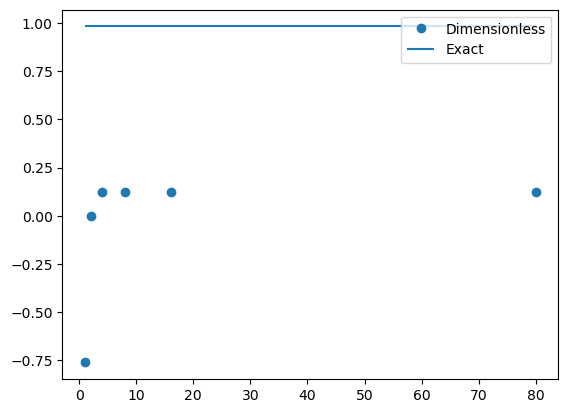

In [115]:
N = [1, 2, 4, 8, 16,80]
j = 0.75
H = 1
new_list = np.array([magnetization_per_spin_our(j,H,i) for i in N])
plt.plot(N,new_list,"o",label='Dimensionless')
plt.hlines(magnetization_per_spin_inf(j,H),min(N),max(N),label='Exact')
plt.legend()
plt.show()

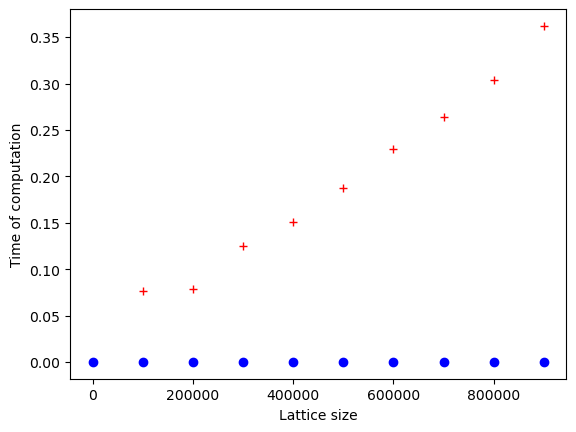

In [177]:
def initialize_lattice(N):
    random_number = np.random.uniform(0,1,size=N)
    lower_index = random_number <= 0.5
    upper_index = random_number > 0.5
    random_number[lower_index],random_number[upper_index] = -1,1
    return random_number


j = 0.75
H = 1e-4
for i in range(10,int(1e6),int(1e6)//10):
    spin_lattice = initialize_lattice(i)
    random_spin_site = np.random.randint(0,i)
    time_before = time.time()
    compute_action = action(j,H,spin_lattice)
    time_after = time.time()
    plt.plot(i,time_after-time_before,'+',c='r')
    time_after = time.time()
    diff_action = action_difference(j,H,random_spin_site,spin_lattice)
    time_now = time.time()
    plt.plot(i,time_now-time_after,'o',c='b')
#plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel("Lattice size")
plt.ylabel("Time of computation")
plt.show()





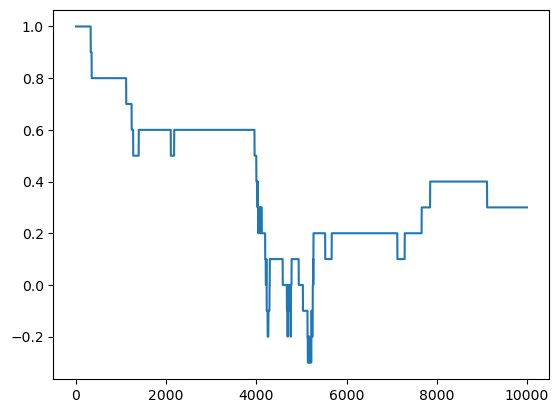

In [240]:
## MCMC 1D Ising Model 
N = 20
j = 0.75
H = 1
spin_lattice = np.ones(N)
samples = int(1e4)
net_magnetisation = np.zeros(samples)

for i in range(samples):
    random_site = np.random.randint(0,N)
    update_probability = np.random.uniform(0,1)
    acception_chance = np.e**(-1*action_difference(j,H,random_site,spin_lattice))
    if update_probability < acception_chance:
        spin_lattice[random_site] *= -1
    net_magnetisation[i] = np.mean(spin_lattice)

plt.plot(net_magnetisation)




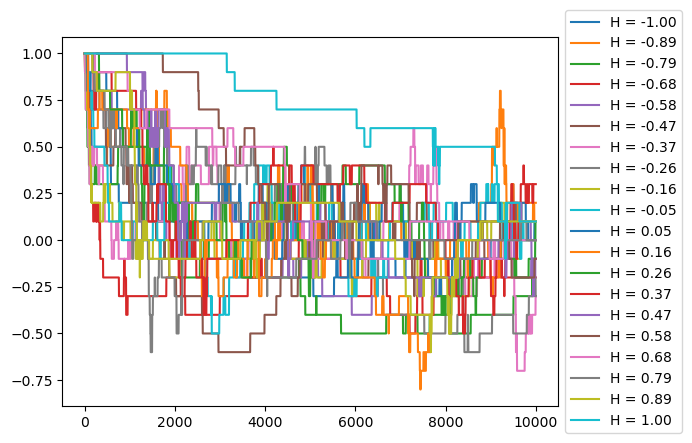

In [241]:
H = np.linspace(-1,1,20)

for k in H:
    spin_lattice = np.ones(N)
    net_magnetisation = np.zeros(samples)

    for i in range(samples):
        random_site = np.random.randint(0,N)
        update_probability = np.random.uniform(0,1)
        acception_chance = np.e**(-1*action_difference(j,k,random_site,spin_lattice))
        if update_probability < acception_chance:
            spin_lattice[random_site] *= -1
        net_magnetisation[i] = np.mean(spin_lattice)

    plt.plot(net_magnetisation,label=f'H = {k:.2f}')

plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()
    